# 1)Importing Libraries

Importing the OS module for changing working Directory.

chdir method in OS module changes the current directory to thedirectory containing data set that I will use for the demo.

PANDAS,NUMPY for data manuplation.
 
Matplotlib,seaborn module for Data Visualisation.  

Importing Decision Tree Regressor, and GridSearchCV for decision trees

In [1]:
import os

data_dir ='C:\\Users\\Keerthi\\Desktop\\Jigsaw\\10 UC-Advance Analytics & Machine Learning\\02-Assignment\\week-5'
os.chdir(data_dir)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir) 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz


Within this directory 'data_dir' there is a file called petrol_consumption.csv                                                              
I will read this file using read_csv method in the PANDAS module and after I have created a PANDAS data frame   
Shape method in pandas module helps in knowing the number of rows ans coulmns present in the data  
I will take a look at the columns,dtypes of this data set       

# 2) Reading Dataset


In [2]:
consp = pd.read_csv('petrol_consumption.csv')
print('Shape of the Dataset-->',consp.shape)
print('dtypes of the Dataset-->',consp.dtypes)

consp.head()



Shape of the Dataset--> (48, 5)
dtypes of the Dataset--> Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### checking all the attributes for missing values.

# 3)Data preprocessing of Training Dataset
 For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following                                                                                      (i) Missing values                                                                                                                 (ii) Outliers

In [3]:
print(consp.isnull().sum() )

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64


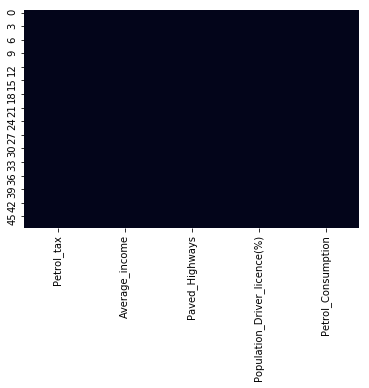

In [4]:
sns.heatmap(consp.isnull(), cbar=False)

### Outliers

### Plot of Independent Numerical variable

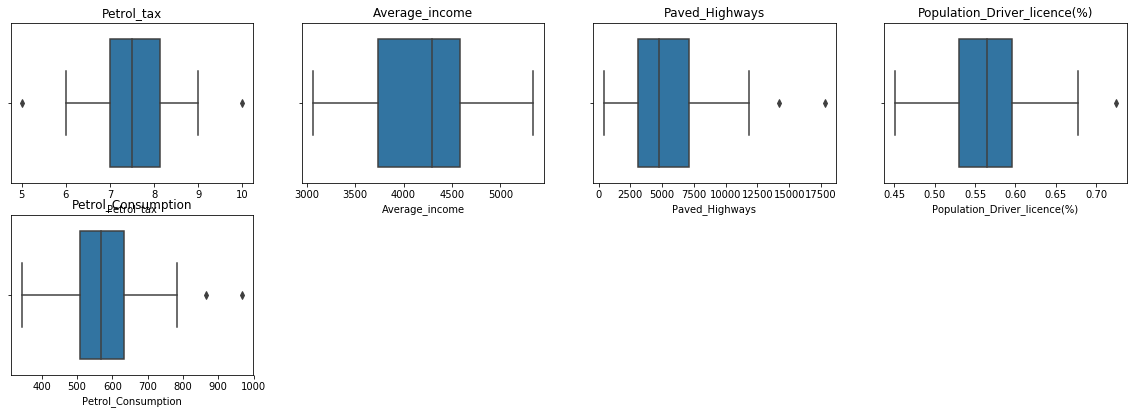

In [5]:
plt.figure(figsize=(20, 10))
X=consp
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = consp[col]
    sns.boxplot(x)
    plt.title(col)

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


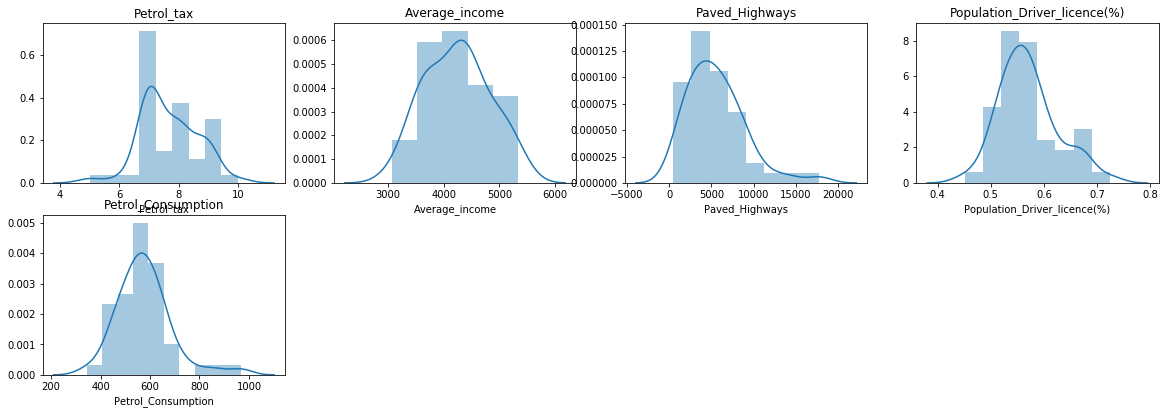

In [6]:

plt.figure(figsize=(20, 10))
df = consp.dropna()
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = consp[col]
    sns.distplot(df[col]);
    plt.title(col)

### (b) Summary Statistics


summary statistics can be created for pandas dataframe using describe method 

In [7]:
print(consp.describe())


       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000  


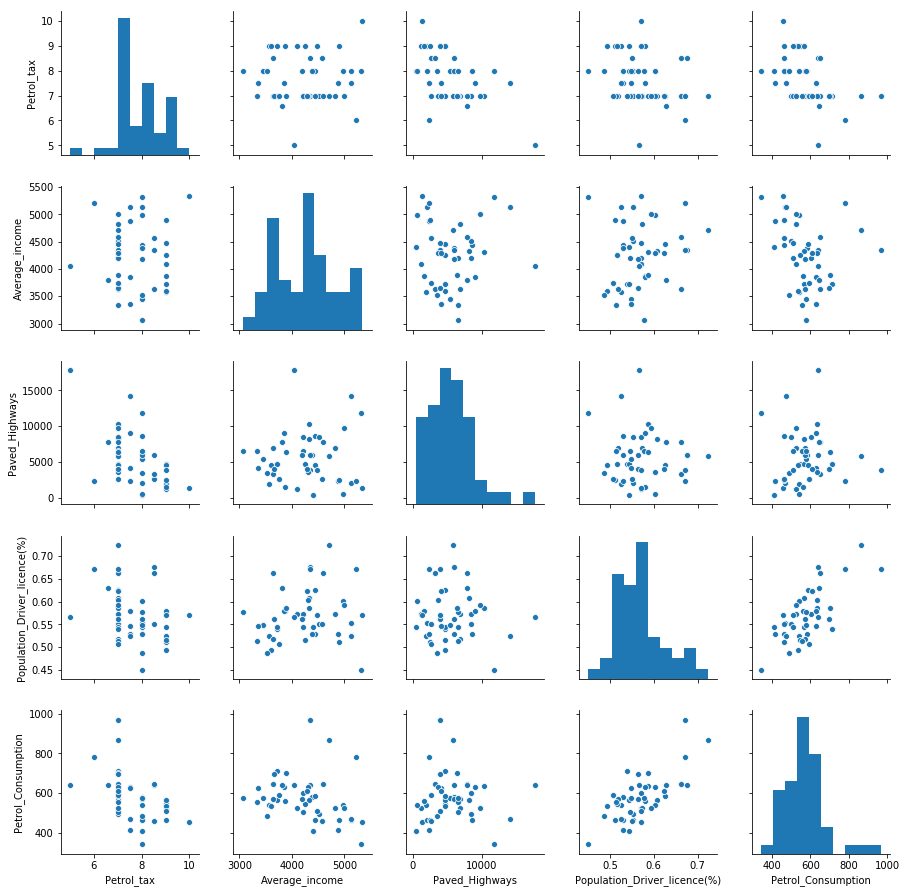

In [8]:
sns.pairplot(consp)
plt.show()
  

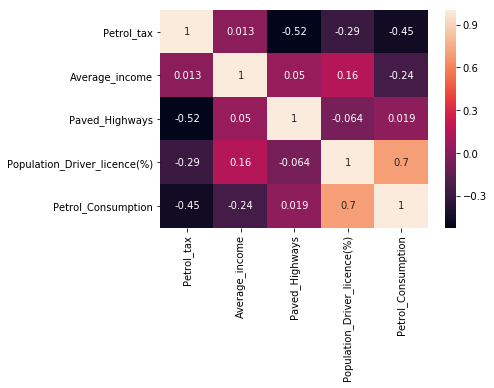

In [9]:
correlation_matrix = consp.corr()
sns.heatmap(data=correlation_matrix, annot=True)

  

### Data Slicing - Creating target-Predictor matrix:

In [10]:
X = consp[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
Y= consp['Petrol_Consumption']


# Divide the data into train and test sets

	the target variable is”Petrol_Consumption”,we want to understand what is causing increase or decrease in the consumption

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)


In [12]:
print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")

print(f"Y_train_and_validate shape is {Y_train.shape}")

print(f"Y_test shape is {Y_test.shape}")

X_train shape is (33, 4)
X_test shape is (15, 4)
Y_train_and_validate shape is (33,)
Y_test shape is (15,)



# Create a regression decision tree : with default parameters

In [13]:
from sklearn.tree import DecisionTreeRegressor
reg_d = DecisionTreeRegressor(random_state =20)
reg_d.fit(X_train, Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=20, splitter='best')

In the case of a continuous-valued attribute, split points for branches is where we have minimum mean square error.

## Feature Importance

In [14]:
pd.Series(reg_d.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Population_Driver_licence(%)    0.588648
Average_income                  0.267758
Paved_Highways                  0.111271
Petrol_tax                      0.032322
dtype: float64

These are the feature importance in the decreasing order. 

# Make predictions and evaluate output.

In [15]:
predictions_decision = reg_d.predict(X_test)

df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_decision, 'Error':(Y_test-predictions_decision)})  
df.head()  


,Actual,Predicted,Error
4,410,577.0,-167.0
8,464,554.0,-90.0
23,547,580.0,-33.0
47,524,471.0,53.0
1,524,561.0,-37.0


In [16]:
np.unique(predictions_decision).round()

array([414., 471., 554., 561., 574., 577., 580., 591., 631., 632., 635.])

The prediction in the case of a decision tree is the mean value of the target variable. 

### Accuracy score of regression tree: Train dataset(Default parameters)

In [17]:
predictions_train = reg_d.predict(X_train)
print('regression score-->',reg_d.score(X_train,Y_train))
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, predictions_train))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, predictions_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, predictions_train)))  
print('RSquare :', r2_score(Y_train, predictions_train))  


regression score--> 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
RSquare : 1.0


### Accuracy score of regression tree: Test dataset(Default parameters)

In [18]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
print('regression score-->',reg_d.score(X_test,Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions_decision))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions_decision))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions_decision)))  
print('RSquare :', r2_score(Y_test, predictions_decision))  


regression score--> -0.11028225074078457
Mean Absolute Error: 61.93333333333333
Mean Squared Error: 5705.4
Root Mean Squared Error: 75.53409826032214
RSquare : -0.11028225074078457


     It is clearly evident that the decision tree is overfitting as we have high score on training data but low score on validation

    With max Depth, the root mean squared error is 75 which is less than 5 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).


    The regression results are not very accurate. Let's try to understand the reason for it by visualizing the tree output.



# Ø visualizing the tree output.

In [19]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir) 

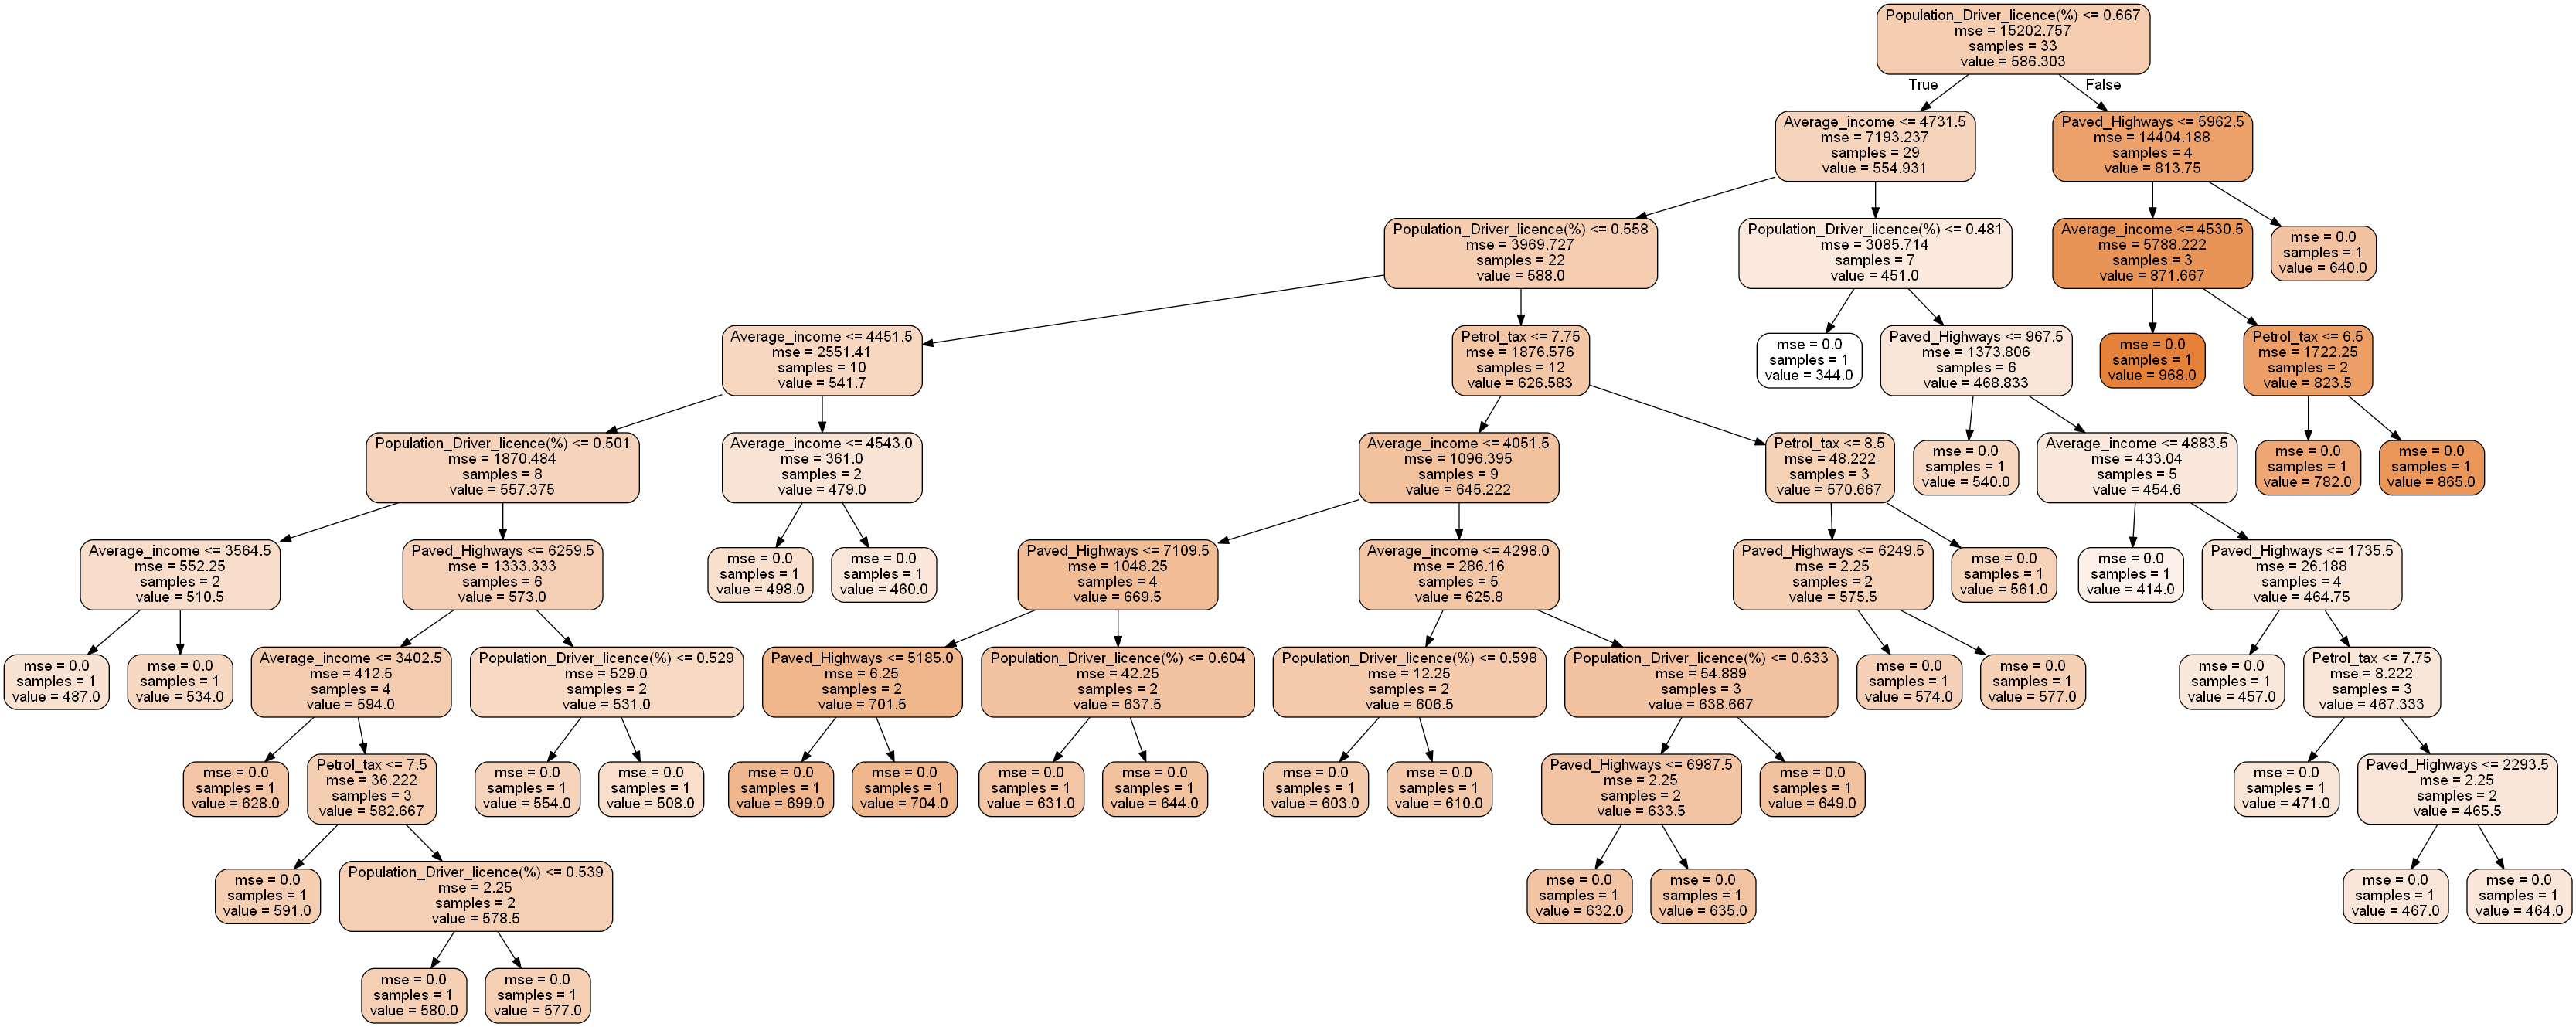

In [20]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(reg_d, filled=True, rounded=True, feature_names=X.columns, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
from IPython.display import Image
Image(graph.create_png())






### 	Identify  Segments in data: :

    In the decision tree chart, each internal node has a decision rule that splits the data. MSE, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

    Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. Let's optimize it by pruning.

# Optimizing Decision Tree Performance


### Selecting the optimal depth of the tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

From the above values we can deduct that at depth of 4 we can have optimal tree 

In [22]:
#Selecting the optimal depth of the tree

for tree_depth in [1,2,3,4,5]:
        print('############################    Tree Depth-->',tree_depth,'  ###########################')
        #tree_model = DecisionTreeRegressor(max_depth=tree_depth,random_state=123)
        tree_model=DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=tree_depth, \
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0,\
                      max_features=None , random_state=20, max_leaf_nodes=10,\
                      min_impurity_decrease= 0.19, min_impurity_split=None, presort=False)
        reg=tree_model.fit(X_train, Y_train)
        feature_imp=reg.feature_importances_
        print('feature_imp-->',feature_imp.round(2))
        y_pred =reg.predict(X_test)
        print('            Regression score-->',reg.score(X_test,Y_test).round(2))
        print('            Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred).round(2))  
        print('            Mean Square Error:', metrics.mean_squared_error(Y_test, y_pred).round())
        print('            Root Mean Squared Error        :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred))) 
        print('            RSquare :', r2_score(Y_test, y_pred).round(2))
       


############################    Tree Depth--> 1   ###########################
feature_imp--> [0.   0.21 0.   0.79]
            Regression score--> -0.12
            Mean Absolute Error: 61.61
            Mean Square Error: 5739.0
            Root Mean Squared Error        : 75.75780576077618
            RSquare : -0.12
############################    Tree Depth--> 2   ###########################
feature_imp--> [0.   0.29 0.   0.71]
            Regression score--> 0.17
            Mean Absolute Error: 58.62
            Mean Square Error: 4264.0
            Root Mean Squared Error        : 65.30117504171864
            RSquare : 0.17
############################    Tree Depth--> 3   ###########################
feature_imp--> [0.06 0.27 0.   0.67]
            Regression score--> 0.3
            Mean Absolute Error: 52.14
            Mean Square Error: 3587.0
            Root Mean Squared Error        : 59.889419704924435
            RSquare : 0.3
############################    Tree Depth

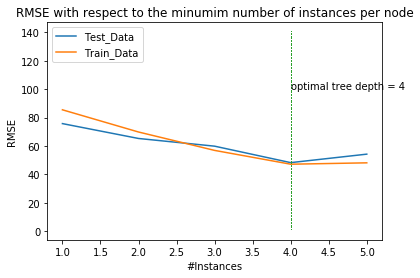

In [23]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
RMSE_test = []
RMSE_train = []
for k in range(1,6):
        tree = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=k, \
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0,\
                      max_features=None , random_state=20, max_leaf_nodes=10,\
                      min_impurity_decrease= 0.19, min_impurity_split=None, presort=False)
       # print('depth-->',k)
        reg=tree.fit(X_train, Y_train)
        predictions_train = reg.predict(X_train)
        score_train=np.sqrt(metrics.mean_squared_error(Y_train, predictions_train))
        RMSE_train.append(score_train)
        predictions_test = reg.predict(X_test)
        score_test=np.sqrt(metrics.mean_squared_error(Y_test, predictions_test))
        RMSE_test.append(score_test)    
ax0.plot(range(1,6),RMSE_test,label='Test_Data')
ax0.plot(range(1,6),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')

plt.plot([4]*140, range(1,141), ",")
plt.text(4, 100, "optimal tree depth = 4")
plt.show()

    The above chart shows the variation in the value of the root mean squared error (RMSE) with respect to number of estimators. Here the X-axis contains the number of estimators while the Y-axis contains the value for root mean squared error.

### Decision tree with depth =4

In [24]:
tree_model_op=DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=4, \
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0,\
                      max_features=None , random_state=20, max_leaf_nodes=10,\
                      min_impurity_decrease= 0.19, min_impurity_split=None, presort=False)
reg_optimal=tree_model_op.fit(X_train, Y_train)

In [25]:
feature_imp=reg_optimal.feature_importances_
feature_imp

array([0.09313187, 0.22081008, 0.08685085, 0.5992072 ])

### Accuracy score of regression tree: Train dataset(Depth=4)

In [26]:
y_pred_optimal =reg_optimal.predict(X_train)
print('            Regression score         :',reg_optimal.score(X_train,Y_train).round(2))
print('            Mean Absolute Error      :', metrics.mean_absolute_error(Y_train, y_pred_optimal).round(2))  
print('            Mean Square Error        :', metrics.mean_squared_error(Y_train, y_pred_optimal).round())

print('            Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(Y_train, y_pred_optimal))) 
print('            RSquare                  :', r2_score(Y_train, y_pred_optimal).round(2))

            Regression score         : 0.85
            Mean Absolute Error      : 33.56
            Mean Square Error        : 2228.0
            Root Mean Squared Error  : 47.20661655387565
            RSquare                  : 0.85


### Accuracy score of regression tree: Test dataset(Depth=4)

In [27]:
print('            Regression score         :',reg_optimal.score(X_test,Y_test).round(2))
print('            Mean Absolute Error      :', metrics.mean_absolute_error(Y_test, y_pred_optimal).round(2))  
print('            Mean Square Error        :', metrics.mean_squared_error(Y_test, y_pred_optimal).round())

print('            Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_optimal))) 
print('            RSquare                  :', r2_score(Y_test, y_pred_optimal).round(2))



feature_imp--> [0.06 0.25 0.09 0.6 ]
            Regression score         : 0.38
            Mean Absolute Error      : 41.6
            Mean Square Error        : 2334.0
            Root Mean Squared Error  : 48.31160431108773
            RSquare                  : 0.55


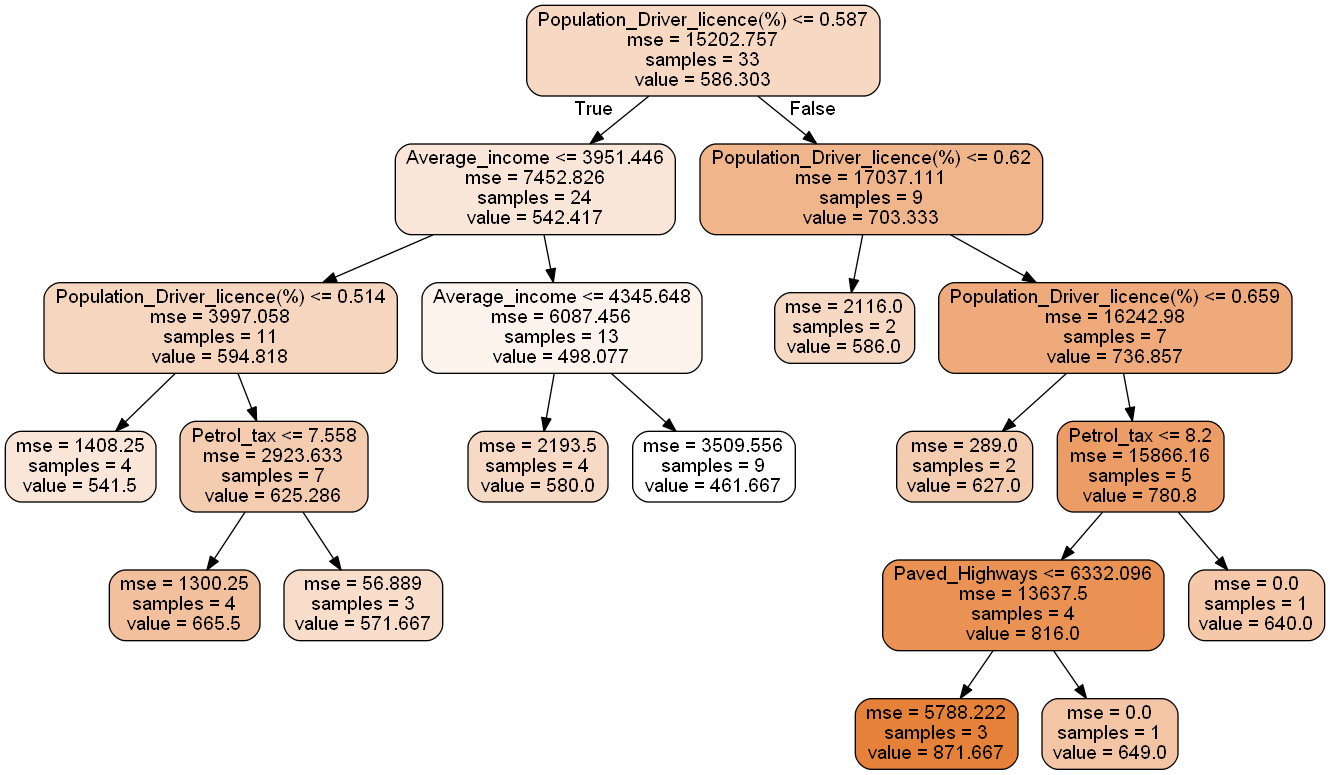

In [28]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(reg_optimal, filled=True, rounded=True, feature_names=X.columns, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
from IPython.display import Image
Image(graph.create_png())


    This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.
    But still we see the low accuracy in test data implies that overfit on train data. 
    Alternatively, Grid Search to find the hyperparameters tuning along with cross validation is used.

    As the score is low to increase the same we will try from hyper parameter tuning using the Grid Search method and Cross validation to fit the tree with best estimators 

# HyperParameter Tuning -GridSearchCV

Exhaustive search over specified parameter values for an estimator.



In [55]:

param_grid = [{ "criterion":['mse'],"splitter" :['best','random'],"max_depth":[1,2,3,4,5,6],"max_features":[1,2,3,4,None]}]


In [56]:
gs = GridSearchCV(estimator=tree_model_op, param_grid = param_grid,cv=10,return_train_score=True)
gs.fit(X_train, Y_train)
predictions_grid = gs.predict(X_test)


C:\Users\Keerthi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Accuracy score of regression tree: Train dataset(Grid seacrh Cv)

In [57]:
y_pred_gs =gs.predict(X_train)
print('            Regression score         :',gs.score(X_train,Y_train).round(2))
print('            Mean Absolute Error      :', metrics.mean_absolute_error(Y_train, y_pred_gs).round(2))  
print('            Mean Square Error        :', metrics.mean_squared_error(Y_train, y_pred_gs).round())

print('            Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(Y_train, y_pred_gs))) 
print('            RSquare                  :', r2_score(Y_train, y_pred_gs).round(2))

            Regression score         : 0.85
            Mean Absolute Error      : 33.56
            Mean Square Error        : 2228.0
            Root Mean Squared Error  : 47.20661655387565
            RSquare                  : 0.85


### Accuracy score of regression tree: Test dataset(Grid seacrh Cv)

In [58]:
print('regression score-->',gs.score(X_test,Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions_grid))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions_grid))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions_grid)))  
print('RSquare :', r2_score(Y_test, predictions_grid))  

regression score--> 0.54579676977978
Mean Absolute Error: 41.599999999999994
Mean Squared Error: 2334.0111111111105
Root Mean Squared Error: 48.31160431108773
RSquare : 0.54579676977978


### 	Print best hyperparameters combination.

In [63]:
gs.best_params_

{'criterion': 'mse', 'max_depth': 2, 'max_features': 2, 'splitter': 'random'}

In [64]:
best=gs.best_estimator_

In [65]:
pd.Series(best.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Petrol_tax                      0.590434
Paved_Highways                  0.400099
Average_income                  0.009468
Population_Driver_licence(%)    0.000000
dtype: float64

### 	Print the complete DecisionTree estimator.

In [53]:
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
           max_leaf_nodes=10, min_impurity_decrease=0.19,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0, presort=False,
           random_state=20, splitter='random')

### Visulaise the Decision tree

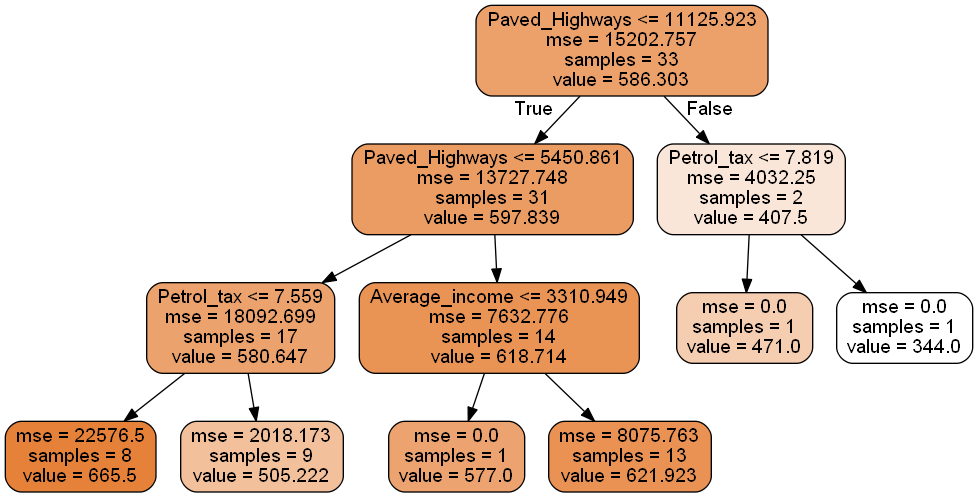

In [54]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(gs.best_estimator_, filled=True, rounded=True, feature_names=X.columns, out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data) 
from IPython.display import Image
Image(graph.create_png())


### Interpretation of Decision Tree

    Regression tree fitted on the petroleum consumption data. The maximum allowed depth for the tree is 2. 
    
    The trend feature selected with feature importance as:
    Petrol_tax                      0.590434
    Paved_Highways                  0.400099
    Average_income                  0.009468
    Population_Driver_licence(%)    0.000000
    
    The feature importance tells us how much a feature helped to improve the purity of all nodes. 
    
     In each node we will have information about the feature on which cutoff point the splitting is being done along with following :
    1)Evaluation metric: Mean Square error
        Here, the variance was used, since predicting petroleum consumption is a regression task.
    2)Samples : number of observations falling in the repective node.
    3)Value : its the mean value of the variable in that node.
    
    
    The first split happens when the Paved_Highways at than mean of 11125, if it is less than then it goes to left split and greater than goes to right split.
    
    Left split : when Paved_Highways <=5450  the split is happening and futher divided based on petrol tax and average income, which is further diveded into splits 
    Right split : when petrol_tax  is less than 7.8 it is further segmented on petrol_tax and still further segmented.
    
    
    Rules derived: (from left to right)
    -----------------------------------
    Node 1 : 
       samples = 8
       Average value =665.5
       MSE= 22576.25
       Rule = when Petrol_tax <=7.558 and Paved_Highways <= 5450 and Paved_Highways <= 11125.446 
        which we can derive is 
        11125 < = Paved_Highways <= 5450 and Petrol_tax <=7.558 
    
    ###########################################################################################################3
    Node 2 : 
       samples = 9
       Average value =505.667
       MSE= 2018.889
       Rule = Petrol_tax > 7.558 and 11125 < = Paved_Highways <= 5450 
     ###########################################################################################################3
    Node 3 : 
       samples = 1
       Average value = 577
       MSE= 0
       Rule = Average_income <=3310 and 11125 < = Paved_Highways <= 5450 
        ###########################################################################################################3
    Node 4 : 
       samples = 13
       Average value = 621
       MSE= 8075
       Rule = Average_income > 3310 and 11125 < = Paved_Highways <= 5450 
     ###########################################################################################################3
    Node 5 : 
       samples = 1
       Average value = 471
       MSE= 0
       Rule = petrol_tax <= 7.818  and  Paved_Highways < 11125 
       
     ###########################################################################################################3
    Node 6 : 
       samples = 1
       Average value = 344
       MSE= 8075
       Rule = petrol_tax > 7.818  and  Paved_Highways < 11125 

### 	Comparing the results

In [42]:
print('       ############ Metrics with Decision tree-No parameters ############')
print('            Regression score            :',reg_d.score(X_test,Y_test).round(2))
print('            Mean Absolute Error         :', metrics.mean_absolute_error(Y_test, predictions_decision).round(2))  
print('            Mean Square Error           :', metrics.mean_squared_error(Y_test, predictions_decision).round())
print('            Root Mean Squared Error     :', np.sqrt(metrics.mean_squared_error(Y_test, predictions_decision))) 
print('            RSquare                     :', r2_score(Y_test, predictions_decision).round(2))

       ############ Metrics with Decision tree-No parameters ############
            Regression score            : -0.11
            Mean Absolute Error         : 61.93
            Mean Square Error           : 5705.0
            Root Mean Squared Error     : 75.53409826032214
            RSquare                     : -0.11


In [43]:
print('       ############ Metrics with Optimal Depth ############')
print('            Regression score            :',reg_optimal.score(X_test,Y_test).round(2))
print('            Mean Absolute Error         :', metrics.mean_absolute_error(Y_test, y_pred_optimal_1).round(2))  
print('            Mean Square Error           :', metrics.mean_squared_error(Y_test, y_pred_optimal_1).round())
print('            Root Mean Squared Error     :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_optimal_1))) 
print('            RSquare                     :', r2_score(Y_test, y_pred_optimal_1).round(2))

       ############ Metrics with Optimal Depth ############
            Regression score            : 0.38
            Mean Absolute Error         : 48.77
            Mean Square Error           : 3194.0
            Root Mean Squared Error     : 56.51983054332352
            RSquare                     : 0.38


In [44]:
print('       ############ Metrics with GridSearch CV ############')
print('            Regression score            :',gs.score(X_test,Y_test).round(2))
print('            Mean Absolute Error         :', metrics.mean_absolute_error(Y_test, predictions_grid).round(2))  
print('            Mean Square Error           :', metrics.mean_squared_error(Y_test, predictions_grid).round())

print('            Root Mean Squared Error     :', np.sqrt(metrics.mean_squared_error(Y_test, predictions_grid))) 
print('            RSquare                     :', r2_score(Y_test, predictions_grid).round(2))

       ############ Metrics with GridSearch CV ############
            Regression score            : 0.55
            Mean Absolute Error         : 41.6
            Mean Square Error           : 2334.0
            Root Mean Squared Error     : 48.31160431108773
            RSquare                     : 0.55


### Observations


        
    To predict the petrolium cunsumption used the decision tree algorithms 
    1. Decision Tree Regression - Fully Grown
    2. Decision Tree Regression - With Optimal Depth 
    3. Decision Tree Regression - Grid Search
    
    Overall, 
        - on train sample, "Optimal Depth" and "Grid Search" algorithms produced decision tree with Regression score higher than 0.80. "Fully Grown" algorithm results a over fit with Regression score = 1.
        - on test sample, "Fully Grown" and "Optimal Depth" shows low RSquare < 0.35 indicating lower performance on test data. "Grid Search" with RSquare = 0.55 shows acceptable performance on test data. 
    